<a href="https://colab.research.google.com/github/blessjal/practicums/blob/master/new_eras_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [33]:
df = pd.read_excel('/content/sample_data/new_eras_data.xlsx')

df.head()

,masked_patient_id,Age,sex,race,admission_date,discharge_date,date_of_surgery,proc_codes,proc_code_desc,length_of_stay,benign_disease,malignant_disease,diabetes_mellitus,COPD_or_asthma_or_emphysema,Congestive_heart_failure,Obesity_comorb,Tobacco_abuse,chronic_kidney_disease,chronic_steroid_use,chronic_constipation,hemoglobin_yn,hemoglobin_result_value,hemoglobin_result_unit,hematocrit_yn,hematocrit_result_value,hematocrit_result_unit,albumin_yn,albumin_result_value,albumin_result_unit,prealbumin_yn,prealbumin_result_value,prealbumin_result_unit,mu_opioid_antagonist_yn,epidurals_yn,BMI,ostomy_teaching,Tot_bloodloss,urinary_retention,tapblock_yn,avg_painscore,...,anastomoticleak_yn,Fentanyl_Transdermal_mcg,Fentanyl_Transdermal_mcg_mme,Fentanyl_Epidural_mcg,Fentanyl_Epidural_mcg_mme,Fentanyl_IV_mcg,Fentanyl_IV_mcg_mme,Hydrocodone_po_mg,Hydrocodone_po_mg_mme,hydromorphone_po_mg,hydromorphone_po_mg_mme,hydromorphone_Epidural_mg,hydromorphone_Epidural_mg_mme,hydromorphone_IV_mg,hydromorphone_IV_mg_mme,meperidine_po_mg,meperidine_po_mg_mme,meperidine_IV_mg,meperidine_IV_mg_mme,methadone_po_mg,methadone_po_mg_mme,methadone_IV_mg,methadone_IV_mg_mme,morphine_ER_po_mg,morphine_IV_mg,morphine_IV_mg_mme,morphine_po_mg,nalbuphine_iv_mg,nalbuphine_iv_mg_mme,oxycodone_ER_mg,oxycodone_ER_mg_mme,oxycodone_po_mg,oxycodone_po_mg_mme,oxymorphone_ER_po_mg,oxymorphone_ER_po_mg_mme,tramadol_po_mg,tramadol_po_mg_mme,redmission_30day_yn,Unnamed: 79,Total MME
0,720,42,Male,Unknown,2017-10-02 09:05:00,2017-10-09 11:02:00,2017-10-02 09:05:00,45397,"PR LAP, SURG PROCTECTOMY W J-POUCH",7,Y,Y,N,N,N,N,N,N,N,N,Y,14.2,g/dL,Y,42.0,%,N,NaN,NaN,N,NaN,NaN,N,N,27.13,N,NaN,N,N,2.0,...,N,0,0.0,0,0.0,300.0,30.0,0.0,0.0,0,0,0,0,0.5,10,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,20.0,30.0,0,0,0,0.0,Y,NaN,390.5
1,845,68,Male,White,2014-05-24 18:07:00,2014-06-28 12:17:00,2014-05-24 18:07:00,"44160, 44160","PR REMVL COLON & TERM ILEUM W/ILEOCOLOSTOMY, ...",35,Y,N,Y,Y,Y,N,N,Y,N,Y,Y,7.8,g/dL,Y,24.7,%,Y,1.8,g/dL,Y,10.8,mg/dl,N,N,43.96,N,NaN,N,N,4.0,...,N,0,0.0,0,0.0,700.0,70.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,20.0,60.0,0,0.0,0.0,0,0.0,765.0,1147.5,0,0,0,0.0,Y,NaN,2762.5
2,1286,62,Male,White,2019-01-11 05:29:00,2019-01-16 11:59:00,2019-01-11 05:29:00,"44207, 44213","PR LAP,SURG,COLECTOMY,W/ANAST, PR LAP, SURG M...",5,Y,N,Y,N,N,N,N,N,N,N,Y,14.8,g/dL,Y,42.8,%,N,NaN,NaN,N,NaN,NaN,N,N,26.49,N,NaN,N,N,5.0,...,N,0,0.0,0,0.0,350.0,35.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,50.0,75.0,0,0,0,0.0,N,NaN,510.0
3,2111,65,Male,Black or African American,2018-05-14 08:10:00,2018-05-30 14:12:00,2018-05-14 08:10:00,44210,"PR LAP,SURG,COLECTOMY,TOTAL,W/O PROCTECTOMY",16,Y,N,Y,Y,Y,N,N,N,N,N,Y,8.4,g/dL,Y,26.8,%,Y,3.3,g/dL,N,NaN,NaN,N,N,31.50,Y,NaN,N,Y,3.0,...,Y,0,0.0,0,0.0,575.0,57.5,0.0,0.0,0,0,0,0,0.5,10,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,50.0,75.0,0,0,50,5.0,N,NaN,823.0
4,2813,74,Male,Black or African American,2015-12-29 12:53:00,2016-01-29 10:07:00,2015-12-29 12:53:00,44320,PR COLOSTOMY,31,N,N,Y,Y,N,N,N,N,N,N,Y,8.2,g/dL,Y,24.9,%,Y,1.5,g/dL,Y,8.7,mg/dl,N,N,NaN,N,NaN,N,N,4.0,...,N,75,7.5,0,0.0,1050.0,105.0,0.0,0.0,0,0,0,0,12.5,250,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,220.0,330.0,0,0,0,0.0,N,NaN,2050.0


In [4]:
df.shape

(1521, 81)

In [6]:
df.dtypes

masked_patient_id               int64
Age                            object
sex                            object
race                           object
admission_date         datetime64[ns]
                            ...      
tramadol_po_mg                  int64
tramadol_po_mg_mme            float64
redmission_30day_yn            object
Unnamed: 79                   float64
Total MME                     float64
Length: 81, dtype: object

In [34]:
import datetime

In [35]:
df['admission_date'] = df['admission_date'].dt.to_period("Y")


In [36]:
df.head()

,masked_patient_id,Age,sex,race,admission_date,discharge_date,date_of_surgery,proc_codes,proc_code_desc,length_of_stay,benign_disease,malignant_disease,diabetes_mellitus,COPD_or_asthma_or_emphysema,Congestive_heart_failure,Obesity_comorb,Tobacco_abuse,chronic_kidney_disease,chronic_steroid_use,chronic_constipation,hemoglobin_yn,hemoglobin_result_value,hemoglobin_result_unit,hematocrit_yn,hematocrit_result_value,hematocrit_result_unit,albumin_yn,albumin_result_value,albumin_result_unit,prealbumin_yn,prealbumin_result_value,prealbumin_result_unit,mu_opioid_antagonist_yn,epidurals_yn,BMI,ostomy_teaching,Tot_bloodloss,urinary_retention,tapblock_yn,avg_painscore,...,anastomoticleak_yn,Fentanyl_Transdermal_mcg,Fentanyl_Transdermal_mcg_mme,Fentanyl_Epidural_mcg,Fentanyl_Epidural_mcg_mme,Fentanyl_IV_mcg,Fentanyl_IV_mcg_mme,Hydrocodone_po_mg,Hydrocodone_po_mg_mme,hydromorphone_po_mg,hydromorphone_po_mg_mme,hydromorphone_Epidural_mg,hydromorphone_Epidural_mg_mme,hydromorphone_IV_mg,hydromorphone_IV_mg_mme,meperidine_po_mg,meperidine_po_mg_mme,meperidine_IV_mg,meperidine_IV_mg_mme,methadone_po_mg,methadone_po_mg_mme,methadone_IV_mg,methadone_IV_mg_mme,morphine_ER_po_mg,morphine_IV_mg,morphine_IV_mg_mme,morphine_po_mg,nalbuphine_iv_mg,nalbuphine_iv_mg_mme,oxycodone_ER_mg,oxycodone_ER_mg_mme,oxycodone_po_mg,oxycodone_po_mg_mme,oxymorphone_ER_po_mg,oxymorphone_ER_po_mg_mme,tramadol_po_mg,tramadol_po_mg_mme,redmission_30day_yn,Unnamed: 79,Total MME
0,720,42,Male,Unknown,2017,2017-10-09 11:02:00,2017-10-02 09:05:00,45397,"PR LAP, SURG PROCTECTOMY W J-POUCH",7,Y,Y,N,N,N,N,N,N,N,N,Y,14.2,g/dL,Y,42.0,%,N,NaN,NaN,N,NaN,NaN,N,N,27.13,N,NaN,N,N,2.0,...,N,0,0.0,0,0.0,300.0,30.0,0.0,0.0,0,0,0,0,0.5,10,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,20.0,30.0,0,0,0,0.0,Y,NaN,390.5
1,845,68,Male,White,2014,2014-06-28 12:17:00,2014-05-24 18:07:00,"44160, 44160","PR REMVL COLON & TERM ILEUM W/ILEOCOLOSTOMY, ...",35,Y,N,Y,Y,Y,N,N,Y,N,Y,Y,7.8,g/dL,Y,24.7,%,Y,1.8,g/dL,Y,10.8,mg/dl,N,N,43.96,N,NaN,N,N,4.0,...,N,0,0.0,0,0.0,700.0,70.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,20.0,60.0,0,0.0,0.0,0,0.0,765.0,1147.5,0,0,0,0.0,Y,NaN,2762.5
2,1286,62,Male,White,2019,2019-01-16 11:59:00,2019-01-11 05:29:00,"44207, 44213","PR LAP,SURG,COLECTOMY,W/ANAST, PR LAP, SURG M...",5,Y,N,Y,N,N,N,N,N,N,N,Y,14.8,g/dL,Y,42.8,%,N,NaN,NaN,N,NaN,NaN,N,N,26.49,N,NaN,N,N,5.0,...,N,0,0.0,0,0.0,350.0,35.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,50.0,75.0,0,0,0,0.0,N,NaN,510.0
3,2111,65,Male,Black or African American,2018,2018-05-30 14:12:00,2018-05-14 08:10:00,44210,"PR LAP,SURG,COLECTOMY,TOTAL,W/O PROCTECTOMY",16,Y,N,Y,Y,Y,N,N,N,N,N,Y,8.4,g/dL,Y,26.8,%,Y,3.3,g/dL,N,NaN,NaN,N,N,31.50,Y,NaN,N,Y,3.0,...,Y,0,0.0,0,0.0,575.0,57.5,0.0,0.0,0,0,0,0,0.5,10,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,50.0,75.0,0,0,50,5.0,N,NaN,823.0
4,2813,74,Male,Black or African American,2015,2016-01-29 10:07:00,2015-12-29 12:53:00,44320,PR COLOSTOMY,31,N,N,Y,Y,N,N,N,N,N,N,Y,8.2,g/dL,Y,24.9,%,Y,1.5,g/dL,Y,8.7,mg/dl,N,N,NaN,N,NaN,N,N,4.0,...,N,75,7.5,0,0.0,1050.0,105.0,0.0,0.0,0,0,0,0,12.5,250,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,220.0,330.0,0,0,0,0.0,N,NaN,2050.0


In [37]:
df_yearly = df[['admission_date', 'tapblock_yn', 'Total MME', 'length_of_stay', 'redmission_30day_yn', 'anastomoticleak_yn']]



columns = ['Date', 'Tapblock', 'MME', 'LOS', 'Readmit', 'Leak']
df_yearly.columns = columns
df_yearly.head()

,Date,Tapblock,MME,LOS,Readmit,Leak
0,2017,N,390.5,7,Y,N
1,2014,N,2762.5,35,Y,N
2,2019,N,510.0,5,N,N
3,2018,Y,823.0,16,N,Y
4,2015,N,2050.0,31,N,N


In [38]:
df_yearly.reset_index()

,index,Date,Tapblock,MME,LOS,Readmit,Leak
0,0,2017,N,390.50,7,Y,N
1,1,2014,N,2762.50,35,Y,N
2,2,2019,N,510.00,5,N,N
3,3,2018,Y,823.00,16,N,Y
4,4,2015,N,2050.00,31,N,N
...,...,...,...,...,...,...,...
1516,1516,2020,N,444.25,11,Y,Y
1517,1517,2019,Y,175.00,2,N,N
1518,1518,2019,N,1116.50,5,N,N
1519,1519,2020,N,549.00,6,N,N


In [39]:
df_yearly.columns

Index(['Date', 'Tapblock', 'MME', 'LOS', 'Readmit', 'Leak'], dtype='object')

In [40]:
grouped = df_yearly.groupby('Date')['MME', 'LOS'].mean()
grouped


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,MME,LOS
Date,,
2014,1360.408529,11.017647
2015,1234.211245,10.349398
2016,1058.604231,10.261538
2017,1110.971033,9.900369
2018,833.930669,8.516729
2019,768.417953,7.882550
2020,367.062500,8.750000


In [41]:
grouped['MPD'] = grouped.MME/grouped.LOS #MPD = MME per Day

grouped

,MME,LOS,MPD
Date,,,
2014,1360.408529,11.017647,123.475414
2015,1234.211245,10.349398,119.254404
2016,1058.604231,10.261538,103.162331
2017,1110.971033,9.900369,112.215114
2018,833.930669,8.516729,97.916783
2019,768.417953,7.882550,97.483418
2020,367.062500,8.750000,41.950000


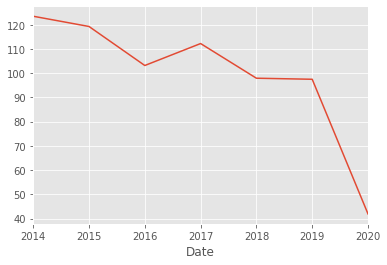

In [42]:
grouped['MPD'].plot()

In [44]:
df_yearly.groupby('Date')['LOS'].mean()

Date
2014    11.017647
2015    10.349398
2016    10.261538
2017     9.900369
2018     8.516729
2019     7.882550
2020     8.750000
Freq: A-DEC, Name: LOS, dtype: float64

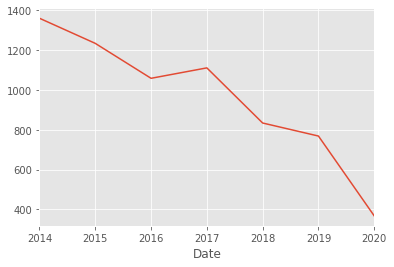

In [45]:
grouped['MME'].plot()

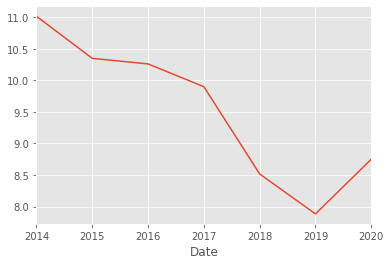

In [46]:
grouped.LOS.plot()

In [49]:
df_yearly.groupby('Date')['Tapblock'].value_counts()

Date  Tapblock
2014  N           170
2015  N           151
      Y            98
2016  N           147
      Y           113
2017  N           147
      Y           124
2018  N           145
      Y           124
2019  Y           169
      N           129
2020  N             4
Name: Tapblock, dtype: int64

In [50]:
tap_mme = df_yearly.groupby('Date').mean()
tap_mme

,MME,LOS
Date,,
2014,1360.408529,11.017647
2015,1234.211245,10.349398
2016,1058.604231,10.261538
2017,1110.971033,9.900369
2018,833.930669,8.516729
2019,768.417953,7.882550
2020,367.062500,8.750000


In [64]:
tap_mme = df_yearly.groupby('Tapblock')['MME'].mean()
tap_mme

Tapblock
N    1259.124692
Y     709.051115
Name: MME, dtype: float64

In [61]:
tap_mme.reset_index()
n = tap_mme.iloc[0]
y = tap_mme.iloc[1]
y

709.0511146496809

In [62]:
pct_reduc = (n-y)/(n)

In [63]:
pct_reduc
print('The percent reduction in MME for Tapblock: {:.4f}'.format(pct_reduc*100) + '%')

The percent reduction in MME for Tapblock: 43.6870%


In [72]:
tap1 = df_yearly.groupby('Date')['MME'].mean()


tap1

Date
2014    1360.408529
2015    1234.211245
2016    1058.604231
2017    1110.971033
2018     833.930669
2019     768.417953
2020     367.062500
Freq: A-DEC, Name: MME, dtype: float64

In [75]:

tap1 = pd.DataFrame(tap1)

In [76]:
tap1['Diff1'] = tap1.pct_change()
tap1

,MME,Diff1
Date,,
2014,1360.41,NaN
2015,1234.21,-0.0927643
2016,1058.6,-0.142283
2017,1110.97,0.0494678
2018,833.931,-0.249368
2019,768.418,-0.0785589
2020,367.062,-0.522314
Diff1,Date 2014 NaN 2015 -0.092764 2016 ...,Date 2014 NaN 2015 -1.000253 2016 ...


In [77]:
tap1.dropna(axis=0)

,MME,Diff1
Date,,
2015,1234.21,-0.0927643
2016,1058.6,-0.142283
2017,1110.97,0.0494678
2018,833.931,-0.249368
2019,768.418,-0.0785589
2020,367.062,-0.522314
Diff1,Date 2014 NaN 2015 -0.092764 2016 ...,Date 2014 NaN 2015 -1.000253 2016 ...


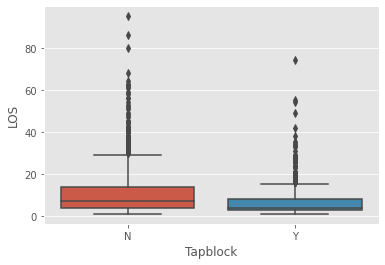

In [90]:
sns.boxplot(data=df_yearly, x='Tapblock', y='LOS')

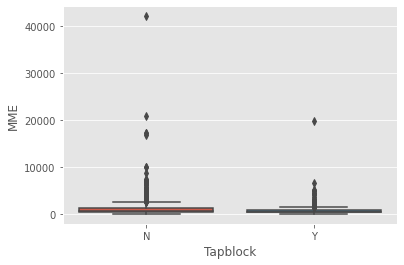

In [91]:
sns.boxplot(data=df_yearly, x='Tapblock', y='MME')

In [93]:
df_yearly.groupby('Readmit').aggfunc(['mean', 'count'])

,MME,LOS
Readmit,,
N,960.546627,9.180723
Y,1354.354710,11.036232


In [97]:
df_yearly.groupby('Leak').median()

,MME,LOS
Leak,,
N,595.0,5
Y,1053.9,14


In [104]:
pd.pivot_table(df_yearly, index = ['Readmit', 'Tapblock'], values=['MME', 'LOS'],
                     aggfunc={'MME' : 'mean', 'LOS' : 'median'})

LOS          MME
Readmit Tapblock                  
N       N           7  1186.466690
        Y           4   666.558226
Y       N           8  1529.766138
        Y           6   973.288506

In [105]:
pd.pivot_table(df_yearly, index = ['Leak', 'Tapblock'], values=['MME', 'LOS'],
                     aggfunc={'MME' : 'mean', 'LOS' : 'median'})

LOS          MME
Leak Tapblock                   
N    N          7.0  1240.612368
     Y          4.0   684.302782
Y    N         14.5  1653.900000
     Y         12.0  1128.358571

In [125]:
mme_per_day = df_yearly.MME.mean()/df_yearly.LOS.mean()

print('The overall MME per day: {:.2f}'.format(mme_per_day))

The overall MME per day: 108.43
